In [61]:
# Packages needed for plots and analysis. 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import itertools as it
import seaborn as sns
import scipy.cluster.hierarchy as sch
sns.set_style("darkgrid")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [62]:
dfo=pd.read_csv("./data_sinMV.csv", sep=",")
dfs=pd.read_csv("./SIM.csv", sep=",")
dfb=pd.read_csv("./Bloom.csv", sep=",", na_values = 0 ).fillna(0.01)


In [63]:
#Saving a new df 
#dfss = [dfo, dfs, dfb]
#multiplesample = pd.concat(dfss, ignore_index = True)
#multiplesample.to_csv("multiplesample.csv", sep = ",", encoding = 'utf-8', index = false)

In [64]:
# Removing outliers and average mesurments
masko =  (dfo["Material"] == "Sandstone") | (dfo["Material"] == "Smithing Slag") | (dfo["Site"] == "Imbasch")  | (dfo["Site"] == "Stumpfwald") 
masks =  (dfs["Mesurment"] != "Unique")
maskb = (dfb["Measurement"] != "Unique")
dfo = dfo.drop(index = dfo.loc[masko].index).reset_index(drop = True)
dfs = dfs.drop(index = dfs.loc[masks].index).reset_index(drop = True)
dfb = dfb.drop(index = dfb.loc[maskb].index).reset_index(drop = True)


In [65]:
dfo =dfo.drop(columns=['Sb', 'Pb','Sr', 'Cs','Ga', 'Zn','U/Th', 'Lu/Hf', 'Zr/Hf', 'Nb/Ta'])


In [66]:
dfs =dfs.drop(columns=['Na2O', 'MgO', 'Al2O3',
       'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO', 'MnO',
       'Fe2O3', 'Sb' , 'Sr', 'Cs', 'Ga', 'Zn', ])

In [67]:
dfb =dfb.drop(columns=['Na2O', 'MgO', 'Al2O3',
       'SiO2', 'P2O5', 'K2O','CaO', 'TiO', 'MnO',
       'Fe2O3', 'Pb','Sr', 'Cs', 'Ga', 'Zn'])

In [68]:
Main=[ 'MgO (%)', 'Al2O3 (%)', 'SiO2 (%)',
       'K2O (%)', 'CaO (%)', 'MnO (%)',]

Trace=['La','Y', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Er', 'Yb', 'Th', 'U']

In [69]:
key = ["Sample", "Material"]
xto = dfo.loc[:, key +Trace]#.values
y = dfo.loc[:,["Sample"]].values
elements = ['Th', 'Pr', 'Tb', 'Dy', 'U', 'Er']

def logfun(s, e): #s es una fila de la tabla y e es la lista de elementos usados para definir tu nueva variable
    n = len(e) # numero de elementos
    se = s.loc[e] # valores de la fila asociados a los elementos escogidos
    term1 = s.apply(np.log10) # logaritmo de cada uno de los elementos de la fila
    term2 = 1/n * se.apply(np.log10).sum() # suma de los logaritmos de los elementos escogidos dividido por n
    return term1 - term2
# 
xto.loc[:, Trace] = xto.loc[:, Trace].apply(lambda x: logfun(x, elements), axis = 1) # definir la variable "X_E"

In [70]:
xmo = dfo.loc[:, key+Main]#.values
y = dfo.loc[:,["Sample"]].values
elements = ['SiO2 (%)','CaO (%)','MnO (%)']

def logfun(s, e): #s es una fila de la tabla y e es la lista de elementos usados para definir tu nueva variable
    n = len(e) # numero de elementos
    se = s.loc[e] # valores de la fila asociados a los elementos escogidos
    term1 = s.apply(np.log10) # logaritmo de cada uno de los elementos de la fila
    term2 = 1/n * se.apply(np.log10).sum() # suma de los logaritmos de los elementos escogidos dividido por n
    return term1 - term2
# 
xmo.loc[:,Main] = xmo.loc[:,Main].apply(lambda x: logfun(x, elements), axis = 1)# definir la variable "X_E"

In [71]:
xo = xto.merge(xmo, how = 'inner', on = key)


In [72]:
key = ["Key", "Sample", "Material"]
xtb = dfb.loc[:, key +Trace]#.values
y = dfb.loc[:,["Sample"]].values
elements = ['Th', 'Pr', 'Tb', 'Dy', 'U', 'Er']

def logfun(s, e): #s es una fila de la tabla y e es la lista de elementos usados para definir tu nueva variable
    n = len(e) # numero de elementos
    se = s.loc[e] # valores de la fila asociados a los elementos escogidos
    term1 = s.apply(np.log10) # logaritmo de cada uno de los elementos de la fila
    term2 = 1/n * se.apply(np.log10).sum() # suma de los logaritmos de los elementos escogidos dividido por n
    return term1 - term2
#xtb.loc[:, Trace ]
# 
xtb.loc[:, Trace ] = xtb.loc[:,Trace].apply(lambda x: logfun(x, elements), axis = 1)# definir la variable "X_E"

In [73]:
key = ["Key", "Sample", "Material"]
xmb = dfb.loc[:, key + Main]#.values
y = dfb.loc[:,["Sample"]].values
elements = ['SiO2 (%)','CaO (%)','MnO (%)']

def logfun(s, e): #s es una fila de la tabla y e es la lista de elementos usados para definir tu nueva variable
    n = len(e) # numero de elementos
    se = s.loc[e] # valores de la fila asociados a los elementos escogidos
    term1 = s.apply(np.log10) # logaritmo de cada uno de los elementos de la fila
    term2 = 1/n * se.apply(np.log10).sum() # suma de los logaritmos de los elementos escogidos dividido por n
    return term1 - term2
# 
xmb.loc[:,Main] = xmb.loc[:,Main].apply(lambda x: logfun(x, elements), axis = 1).values # definir la variable "X_E"

In [74]:
xb = xtb.merge(xmb, how = 'inner', on = key)#.drop(columns= "Key")
print(xb)

    Key        Sample Material        La         Y        Ce        Pr  \
0     1  MA-200988-1A    Bloom  0.606852  0.940701  0.878765 -0.002683   
1     2  MA-200988-1A    Bloom  0.468685  1.064496  0.789918 -0.090107   
2     3  MA-200988-1A    Bloom  0.616992  0.929746  0.874897  0.003992   
3     4  MA-200988-1A    Bloom  0.558275  1.039427  0.806059 -0.065582   
4     5  MA-200988-1A    Bloom  0.466950  1.149530  0.730192 -0.151500   
5     6  MA-200988-1A    Bloom  0.541089  1.024263  0.818638 -0.038695   
6     7  MA-200988-1A    Bloom  0.569643  0.986215  0.860135 -0.038408   
7     8  MA-200988-1A    Bloom  0.549827  0.984939  0.855453 -0.043090   
8     9  MA-200988-1A    Bloom  0.594732  0.949007  0.872852 -0.023059   
9    10  MA-200988-1A    Bloom  0.625875  0.912977  0.918896  0.010631   
10   11  MA-200988-1A    Bloom  0.563739  0.946787  0.891958 -0.023923   
11   12  MA-200988-1B    Bloom  0.627888  0.965523  0.990848  0.045039   
12   13  MA-200988-1B    Bloom  0.6123

In [75]:
key = ["Key", "Sample", "Material"]
xts = dfs.loc[:, key + Trace]#.values
y = dfs.loc[:,["Sample"]].values
elements = ['Th', 'Pr', 'Tb', 'Dy', 'U', 'Er']

def logfun(s, e): #s es una fila de la tabla y e es la lista de elementos usados para definir tu nueva variable
    n = len(e) # numero de elementos
    se = s.loc[e] # valores de la fila asociados a los elementos escogidos
    term1 = s.apply(np.log10) # logaritmo de cada uno de los elementos de la fila
    term2 = 1/n * se.apply(np.log10).sum() # suma de los logaritmos de los elementos escogidos dividido por n
    return term1 - term2
# 
xts.loc[:,Trace] = xts.loc[:,Trace].apply(lambda x: logfun(x, elements), axis = 1).values # definir la variable "X_E"

In [76]:
key = ["Key", "Sample", "Material"]
xms = dfs.loc[:, key + Main]#.values
y = dfs.loc[:,["Sample"]].values
elements = ['SiO2 (%)','CaO (%)','MnO (%)']

def logfun(s, e): #s es una fila de la tabla y e es la lista de elementos usados para definir tu nueva variable
    n = len(e) # numero de elementos
    se = s.loc[e] # valores de la fila asociados a los elementos escogidos
    term1 = s.apply(np.log10) # logaritmo de cada uno de los elementos de la fila
    term2 = 1/n * se.apply(np.log10).sum() # suma de los logaritmos de los elementos escogidos dividido por n
    return term1 - term2
# 
xms.loc[:, Main] = xms.loc[:, Main].apply(lambda x: logfun(x, elements), axis = 1).values # definir la variable "X_E"

In [77]:
xs = xts.merge(xms, how = 'inner', on = key)#.drop(columns= "Key")


In [78]:
dfs = [xts, xtb, xto]
mv = pd.concat(dfs, ignore_index = True)
mv

,Key,Sample,Material,La,Y,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Er,Yb,Th,U
0,1.0,MA-201419,Iron-SI,0.882914,1.114744,1.119571,0.234077,0.833081,0.207604,-0.387857,0.238337,-0.602866,0.200548,0.007039,-0.024036,0.072396,0.088805
1,2.0,MA-201419,Iron-SI,0.885917,1.100510,1.125032,0.224327,0.816367,0.174809,-0.396868,0.251829,-0.618282,0.227126,0.017704,-0.017854,0.075884,0.073241
2,3.0,MA-201419,Iron-SI,0.887353,1.089420,1.125801,0.222401,0.806315,0.116394,-0.439117,0.289569,-0.565482,0.198799,-0.004339,0.009564,0.099835,0.048786
3,4.0,MA-201419,Iron-SI,0.878565,1.102053,1.111872,0.205763,0.837459,0.126950,-0.388997,0.241374,-0.593117,0.227303,0.013264,-0.062775,0.070897,0.075889
4,5.0,MA-201419,Iron-SI,0.888333,1.118046,1.132312,0.235692,0.841139,0.196500,-0.401937,0.266319,-0.585305,0.198809,-0.003735,-0.034711,0.068130,0.086409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,NaN,MA-201432,Ore,0.670642,0.883604,1.213924,0.142230,0.736802,0.210765,-0.414072,0.144082,-0.573773,0.201149,-0.080857,-0.106411,0.278165,0.033086
135,NaN,MA-201433,Ore,0.552964,1.119230,1.345533,0.020825,0.594856,0.060170,-0.512155,0.160487,-0.518589,0.235120,0.049788,-0.012225,0.081848,0.131008
136,NaN,MA-201434,Ore,0.817453,0.962136,1.113404,0.292324,0.897195,0.292324,-0.306365,0.324912,-0.490363,0.250932,-0.037864,-0.128783,0.138227,-0.153257
137,NaN,MA-201535,Ore,0.845271,1.068801,0.837380,0.313752,0.905114,0.322526,-0.302867,0.312386,-0.490387,0.261661,-0.014716,-0.095936,-0.176520,0.106210


In [79]:
features = list(mv.columns)
features.remove("Sample")
features.remove("Key")
features.remove("Material")

ele = []
for e in features:
    if not ("/" in e):
        ele.append(e)
elements=ele

x = mv.loc[:, features]#.values
y = mv.loc[:,["Sample"]].values




In [80]:
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)
pdf = pd.DataFrame(data = principalComponents,
                   columns = ["PCA" + str(i+1) for i in range(len(features))])
pdf["Sample"] = y
pdf["Material"] = mv["Material"]
exp_var_pca = pca.explained_variance_ratio_
#"{:.2f}%".format(exp_var[0]*100)
pca.explained_variance_ratio_.cumsum()
vectors_pca = pca.components_[:2, :].T #* np.sqrt(pca.explained_variance_[:2])
vectors_pca

array([[ 0.35829381, -0.22999283],
       [ 0.1756215 ,  0.36617918],
       [ 0.34954207, -0.16669302],
       [ 0.30375482, -0.2109654 ],
       [ 0.29004529, -0.17501996],
       [ 0.22394732, -0.06771128],
       [ 0.12017441,  0.07172359],
       [ 0.10629652,  0.23003873],
       [ 0.06916325,  0.27556383],
       [ 0.07679484,  0.31724674],
       [ 0.09663341,  0.31147486],
       [ 0.08124943,  0.29812966],
       [ 0.10791006, -0.49602385],
       [-0.65425638, -0.19729619]])

(-1, 1)

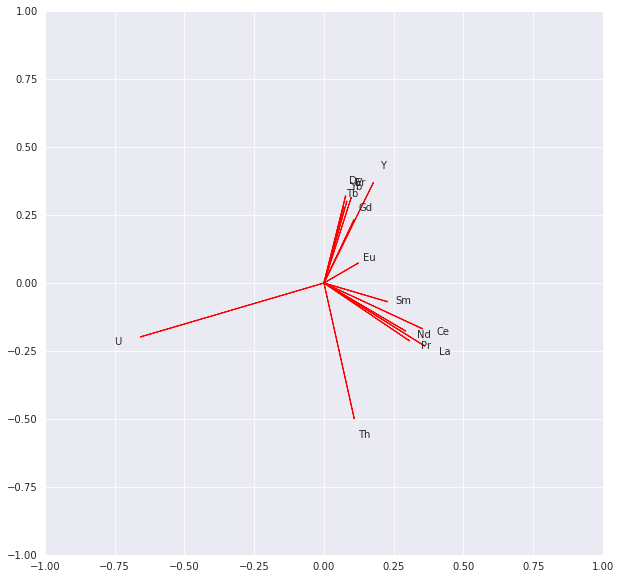

In [81]:
fig, ax = plt.subplots(1, figsize=(10,10))
for u, v, f in zip(vectors_pca[:,0], vectors_pca[:,1], features):
    ax.arrow(0, 0, u, v, color = "red")
    ax.text(u * 1.15, v * 1.15, f)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)


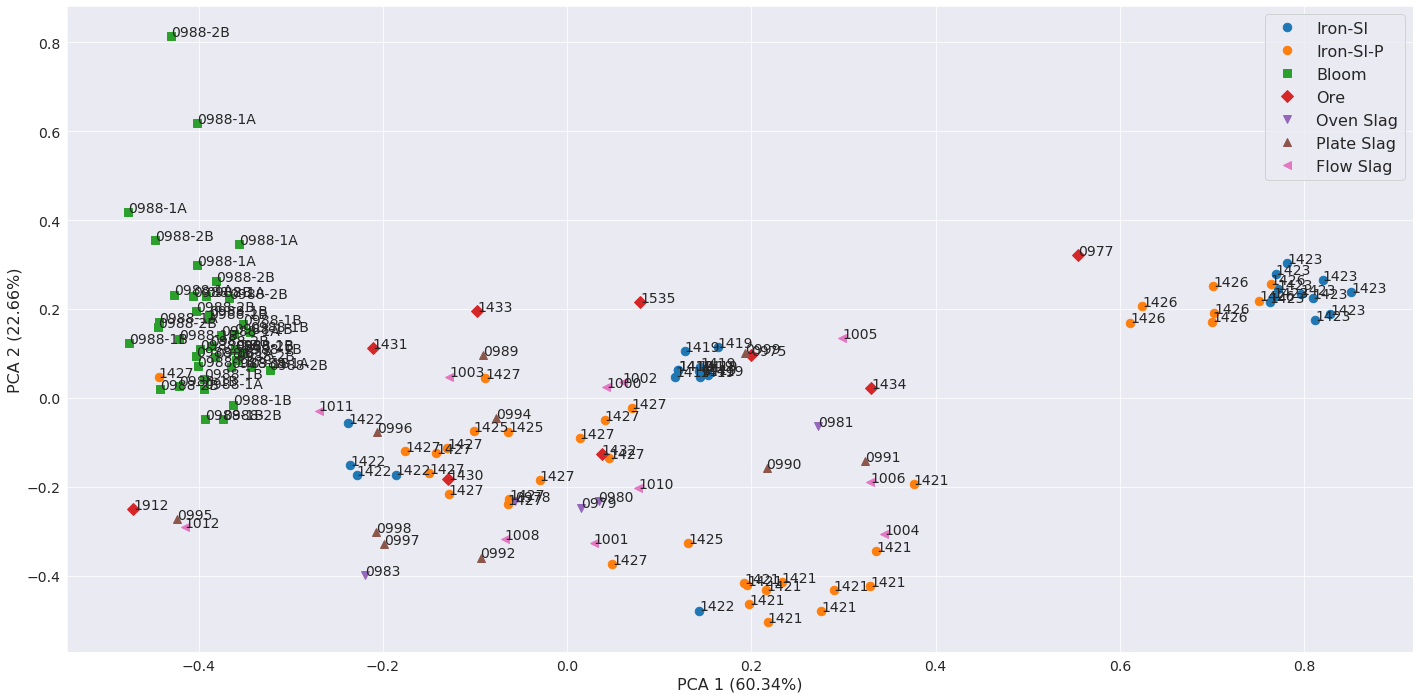

In [82]:
mark_dict = {"Iron-SI": "o", "Iron-SI-P": "o", 
             "Bloom": "s", "Ore": "D", "Oven Slag": "v",
             "Plate Slag": "^", "Flow Slag": "<", "Smithing Slag": ">" }

fig, ax = plt.subplots(1, figsize=(20,10))
for s in pdf["Material"].unique():
    #s=s[0]
    mask=(pdf["Material"] == s)
    df_sample = pdf[mask]
    xx = df_sample["PCA1"].values
    yy = df_sample["PCA2"].values
    ss = df_sample["Sample"].values
    ax.plot(xx, yy, label = s, marker=mark_dict[s], linestyle="", markersize= 8.5)
    for xxi, yyi, ssi in zip(xx,yy,ss):
        ax.text(xxi, yyi, ssi.replace("MA-20", ""), fontsize= 14)
    ax.legend()
    plt.xlabel('PCA 1 ({})'.format("{:.2f}%".format(exp_var_pca[0]*100)), fontsize=16)
    plt.ylabel('PCA 2 ({})'.format("{:.2f}%".format(exp_var_pca[1]*100)), fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.legend(loc='best', fontsize=16)
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()
fig.savefig("./plot2/PCA_ree_samples.png", dpi=200)

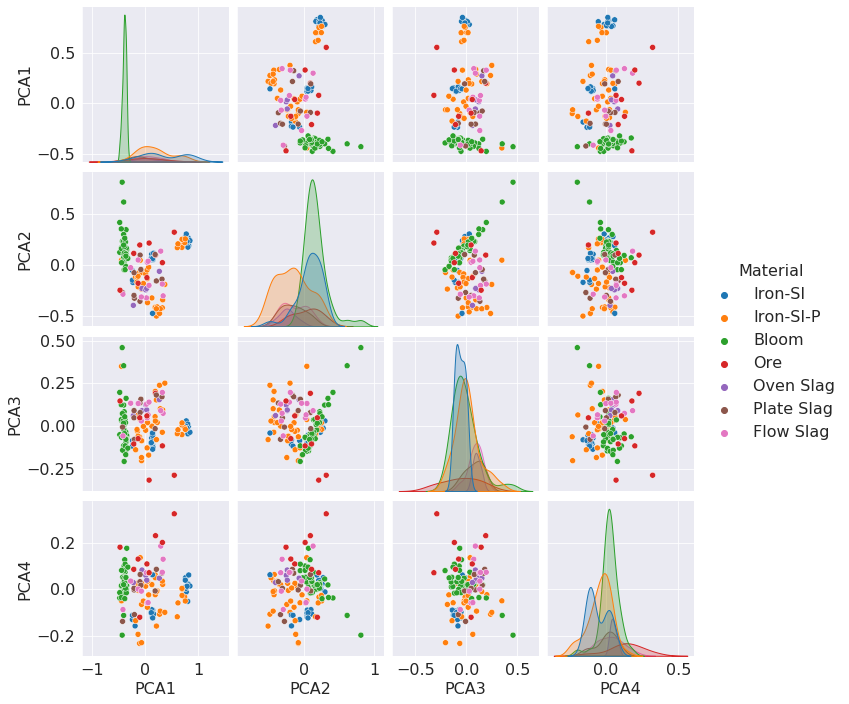

In [83]:
Pcs = ["Material","PCA1","PCA2","PCA3","PCA4"]
PCA1 = pdf[Pcs]
fig = sns.pairplot(PCA1, hue="Material")
fig.savefig("./plot2/PCA_ree.png", dpi=200)

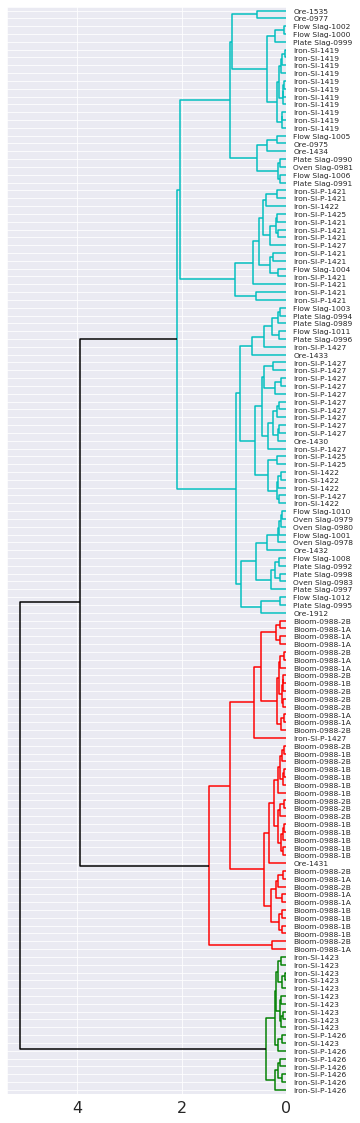

In [84]:
Pcs = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
PCA1 = pdf[Pcs]
fig, ax = plt.subplots(1, figsize=(5,20))

dendrogram = sch.dendrogram(sch.linkage(PCA1, method = "ward"), ax = ax, 
                            labels=(pdf["Material"]+"-"+pdf["Sample"].str.replace("MA-20", "")).values,
                           above_threshold_color='k', orientation= "left")

#ax.set_title("Cluster Dendrogram PCA",fontsize=12)
sch.set_link_color_palette(["tab:blue","tab:red","tab:green"])
ax.tick_params(axis = "y", labelsize = 7.5)

fig.savefig("./plot2/cluster_ree_ward.png", bbox_inches="tight", dpi=300)


In [85]:
m = sch.linkage(PCA1, method = "ward")
#sns.heatmap()
m

array([[3.00000000e+01, 3.60000000e+01, 2.84116322e-02, 2.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 3.02338203e-02, 2.00000000e+00],
       [1.21000000e+02, 1.23000000e+02, 3.36625924e-02, 2.00000000e+00],
       [0.00000000e+00, 4.00000000e+00, 4.02492867e-02, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 4.08484672e-02, 2.00000000e+00],
       [6.90000000e+01, 7.00000000e+01, 4.34429675e-02, 2.00000000e+00],
       [7.50000000e+01, 7.60000000e+01, 4.40314471e-02, 2.00000000e+00],
       [7.30000000e+01, 9.10000000e+01, 4.42439011e-02, 2.00000000e+00],
       [9.70000000e+01, 1.00000000e+02, 5.12778267e-02, 2.00000000e+00],
       [7.90000000e+01, 9.50000000e+01, 5.15994794e-02, 2.00000000e+00],
       [9.40000000e+01, 9.60000000e+01, 5.37306853e-02, 2.00000000e+00],
       [7.70000000e+01, 9.30000000e+01, 5.38299753e-02, 2.00000000e+00],
       [8.20000000e+01, 1.43000000e+02, 5.39137896e-02, 3.00000000e+00],
       [2.70000000e+01, 3.70000000e+01, 5.39780051e

In [86]:
mv["Material_2"] = mv["Material"].replace(["Oven Slag","Plate Slag","Flow Slag","Iron-SI-P"],["Slag", "Slag", "Slag","Iron-SI"])


In [94]:
features = list(mv.columns)
features.remove("Sample")
features.remove("Key")
features.remove("Material")
features.remove("Material_2")

ele = []
for e in features:
    if not ("/" in e):
        ele.append(e)
elements=ele


x = mv.loc[:, features]#.values
y = mv.loc[:,"Material"].values


lda = LDA()
ldf = lda.fit_transform(x, y)
ldf = pd.DataFrame(data = ldf, columns = ["LDA" + str(i+1) for i in range(ldf.shape[1])])
ldf["Material"] = y
ldf["Sample"] = mv["Sample"]
exp_var_lda = lda.explained_variance_ratio_
#"{:.2f}%".format(exp_var[0]*100)
lda.explained_variance_ratio_.cumsum()
vectors_lda = lda.scalings_[:, :2]
vectors_lda

array([[  2.5664517 , -14.16605877],
       [ 20.1921245 , -14.37078129],
       [ -2.47248316,  10.48093247],
       [  6.83705441,  17.86779275],
       [ 16.94737622,   7.84391565],
       [ -4.73751271,  -9.70464607],
       [-10.94888448,   1.85127421],
       [ -5.29858546,   1.34698003],
       [ -7.86308946,  -1.47010009],
       [ -3.94927833,   0.52107035],
       [ -7.75367522,   2.70814195],
       [  1.06290185,   9.05326463],
       [  4.68019634, -11.98390067],
       [  1.06436586,   0.15816582]])

In [92]:
lda.scalings_[:, :2]

array([[  2.5664517 , -14.16605877],
       [ 20.1921245 , -14.37078129],
       [ -2.47248316,  10.48093247],
       [  6.83705441,  17.86779275],
       [ 16.94737622,   7.84391565],
       [ -4.73751271,  -9.70464607],
       [-10.94888448,   1.85127421],
       [ -5.29858546,   1.34698003],
       [ -7.86308946,  -1.47010009],
       [ -3.94927833,   0.52107035],
       [ -7.75367522,   2.70814195],
       [  1.06290185,   9.05326463],
       [  4.68019634, -11.98390067],
       [  1.06436586,   0.15816582]])

(-25, 25)

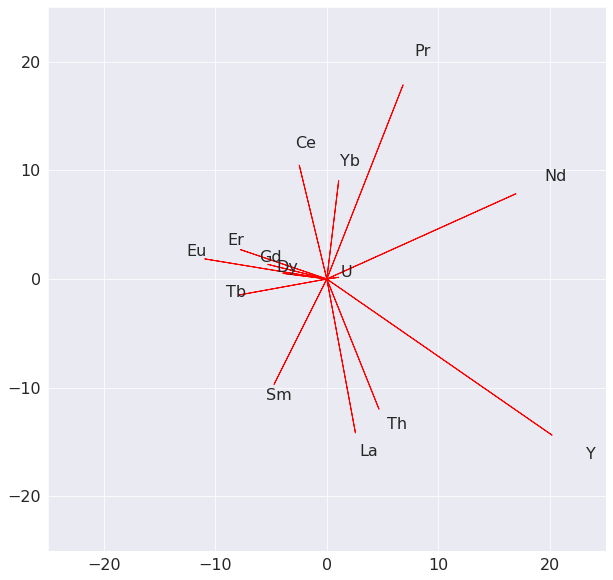

In [97]:
fig, ax = plt.subplots(1, figsize=(10,10))
for u, v, f in zip(vectors_lda[:,0], vectors_lda[:,1], features):
    ax.arrow(0, 0, u, v, color = "red")
    ax.text(u * 1.15, v * 1.15, f)
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)


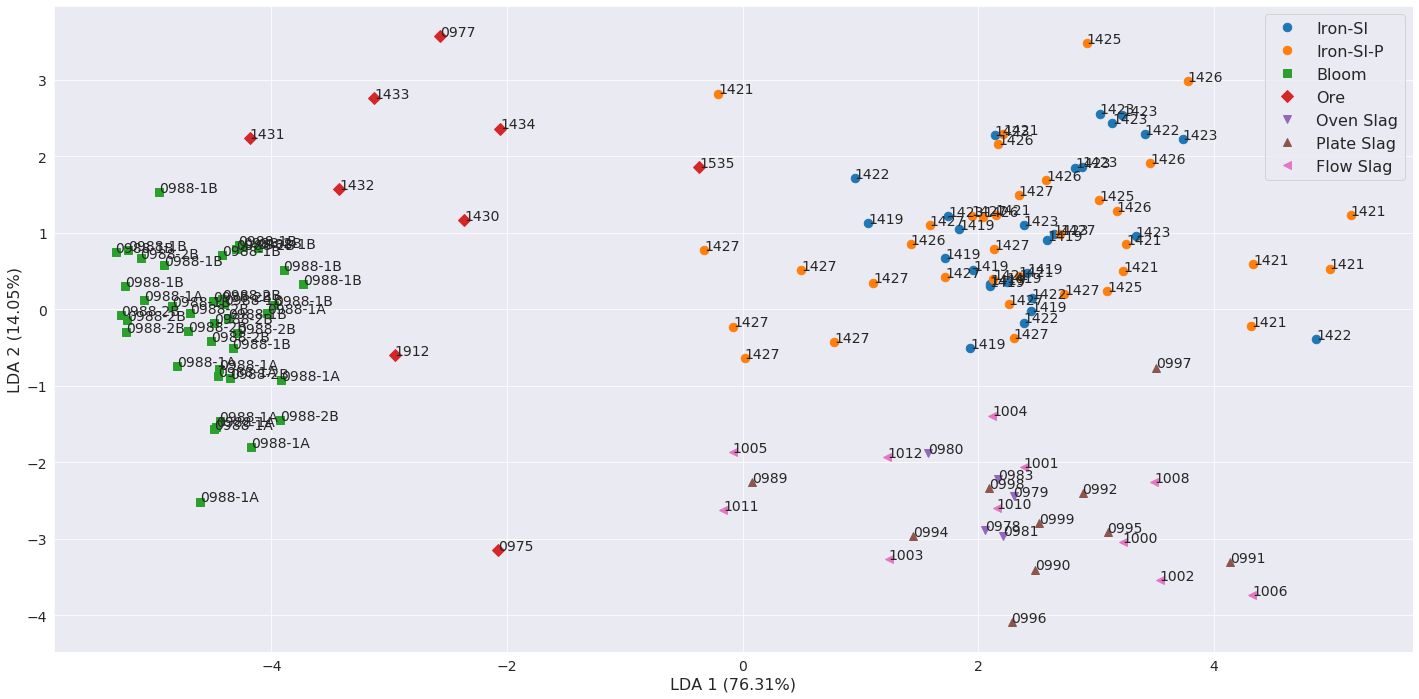

In [93]:
mark_dict = {"Iron-SI": "o", "Iron-SI-P": "o", 
             "Bloom": "s", "Ore": "D", "Oven Slag": "v",
             "Plate Slag": "^", "Flow Slag": "<", "Smithing Slag": ">"  }

fig, ax = plt.subplots(1, figsize=(20,10))
for s in ldf["Material"].unique():
    #s=s[0]
    mask=(ldf["Material"] == s)
    df_sample = ldf[mask]
    xx = df_sample["LDA1"].values
    yy = df_sample["LDA2"].values
    ss = df_sample["Sample"].values
    ax.plot(xx, yy, label = s, marker=mark_dict[s], linestyle="",markersize= 8.5)
    for xxi, yyi, ssi in zip(xx,yy,ss):
        ax.text(xxi, yyi, ssi.replace("MA-20", ""), fontsize= 14)
    ax.legend()
    plt.tight_layout()
    plt.xlabel('LDA 1 ({})'.format("{:.2f}%".format(exp_var_lda[0]*100)), fontsize=16)
    plt.ylabel('LDA 2 ({})'.format("{:.2f}%".format(exp_var_lda[1]*100)), fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.legend(loc='best', fontsize=16)
    plt.rcParams.update({'font.size': 16})
fig.savefig("./plot2/LDA_ree_samples.png", dpi=200)


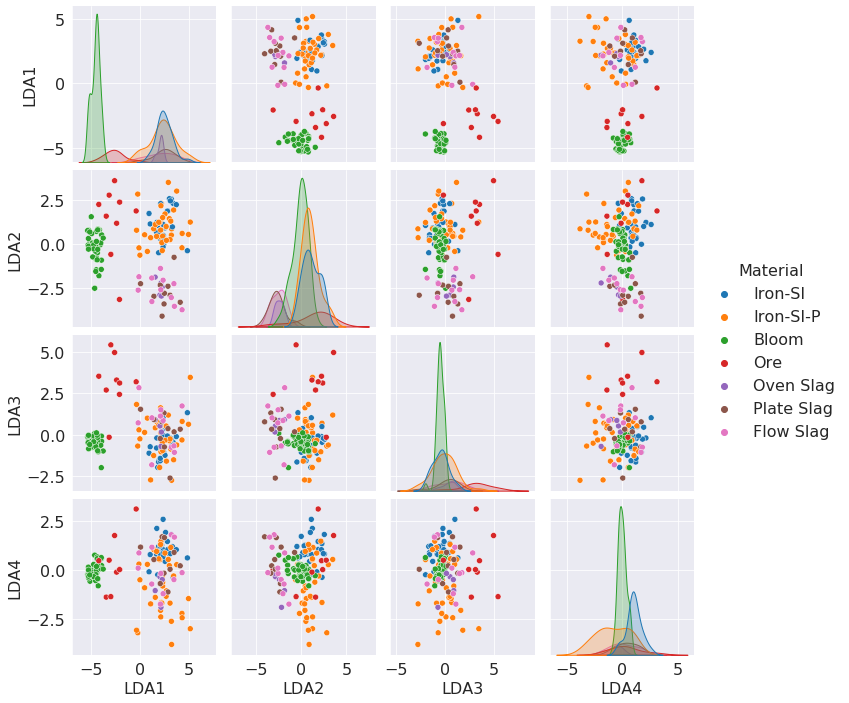

In [98]:
ldfs = ["Material","LDA1","LDA2","LDA3","LDA4"]
LDA1 = ldf[ldfs]
fig = sns.pairplot(LDA1, hue="Material")
fig.savefig("./plot2/LDA_S_ree.png", dpi=200)

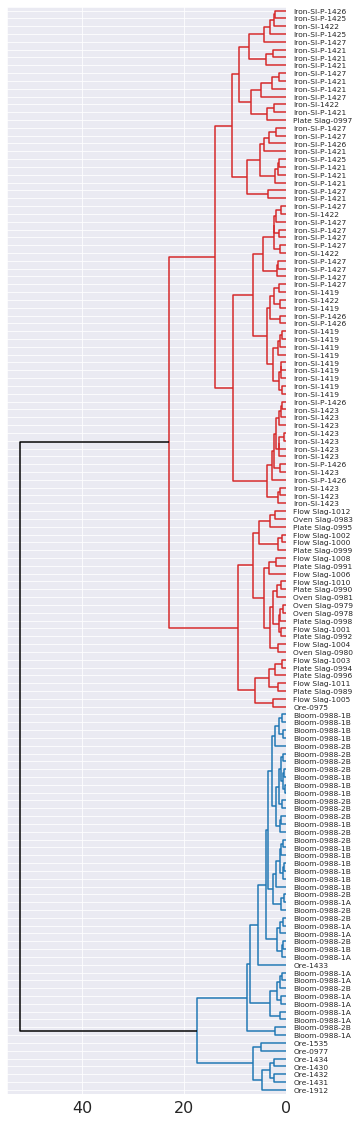

In [99]:
lds = ["LDA1","LDA2","LDA3","LDA4","LDA5","LDA6"]
LDA1 = ldf[lds]
fig, ax = plt.subplots(1, figsize=(5,20))

dendrogram = sch.dendrogram(sch.linkage(LDA1, method = "ward"),  ax = ax,
                            labels=(pdf["Material"]+"-"+pdf["Sample"].str.replace("MA-20", "")).values,
                            orientation= "left", above_threshold_color='k' )
sch.set_link_color_palette(["tab:blue","tab:red","tab:green"])
#ax.set_title("Cluster Dendrogram LDA",fontsize=12)
ax.tick_params(axis = "y", labelsize = 7.5)

fig.savefig("./plot2/lda_cluster_ree_ward.png", bbox_inches="tight", dpi=300)